# What drives the price of a car?

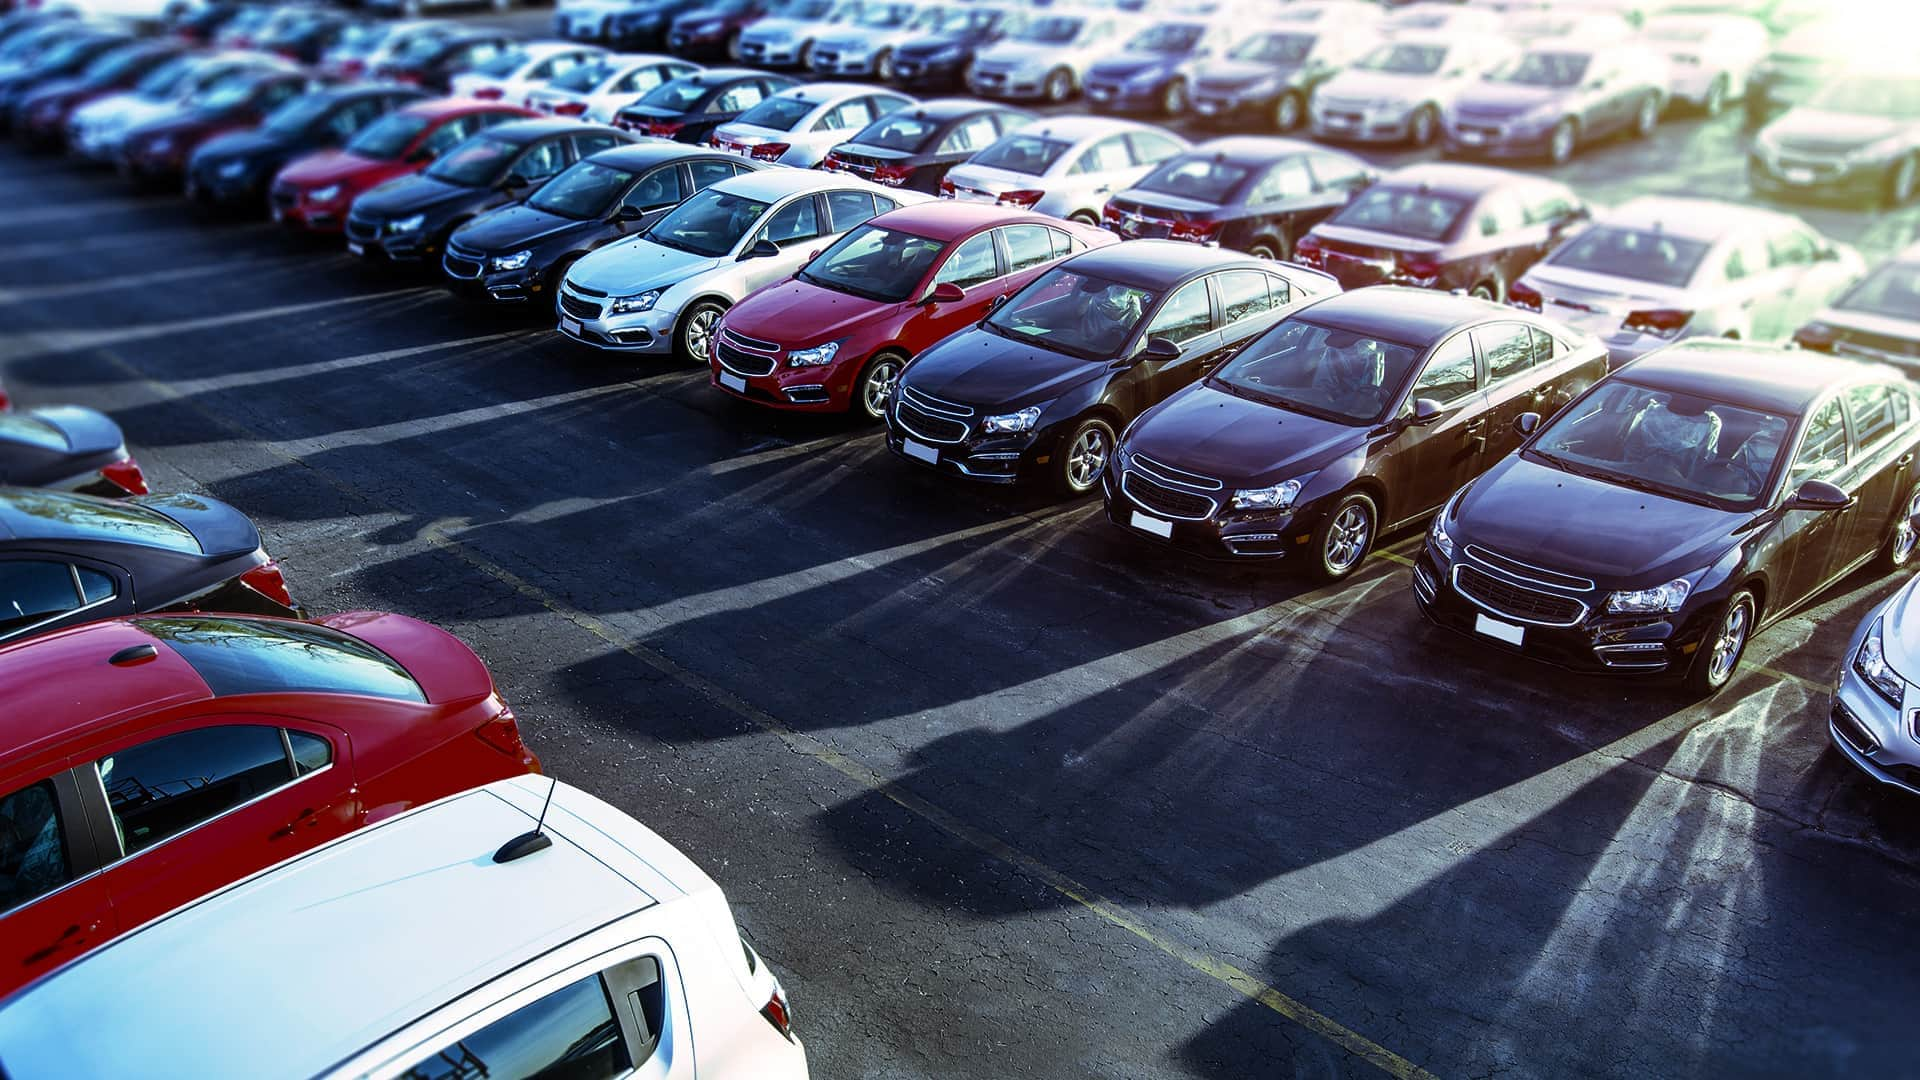

## Overview :

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car. 

## Step 1: Business Understanding

In the highly competitive used car market, understanding the factors that influence a car's resale value is crucial for dealerships aiming to maximize profits while providing value to customers. By leveraging data analytics, we can gain insights into the various features and characteristics that make a used car more or less expensive. These insights can serve as a strategic guide for our client, a used car dealership, in their purchasing and pricing decisions, as well as in marketing strategies to highlight the most valued features of their inventory. Through a comprehensive analysis of a dataset containing information on 426K used cars, we aim to identify the key variables that contribute to a car's resale value. This will enable our client to make data-driven decisions that can improve profitability and customer satisfaction.

## Step 2: Data Understanding

In [567]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Scikit-learn utilities
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.inspection import permutation_importance
from sklearn import set_config

# Miscellaneous
import time
import warnings
import matplotlib.colors as mcolors


warnings.filterwarnings("ignore")

set_config(display="diagram")
# Load the dataset
df = pd.read_csv('Desktop/vehicles.csv')



In [568]:
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### *****Observation*****: the data has a lot of missing Values

In [569]:
# Generate summary statistics for numerical features
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Handling Missing Values

In [571]:
nan_count = df.isna().sum()
print(nan_count)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [572]:
# Check for missing (NaN) values in the entire DataFrame
missing_data_count = df.isna().sum().sum()

# Print the total count of missing (NaN) values in the DataFrame
print("Total missing data count:", missing_data_count)

Total missing data count: 1215152


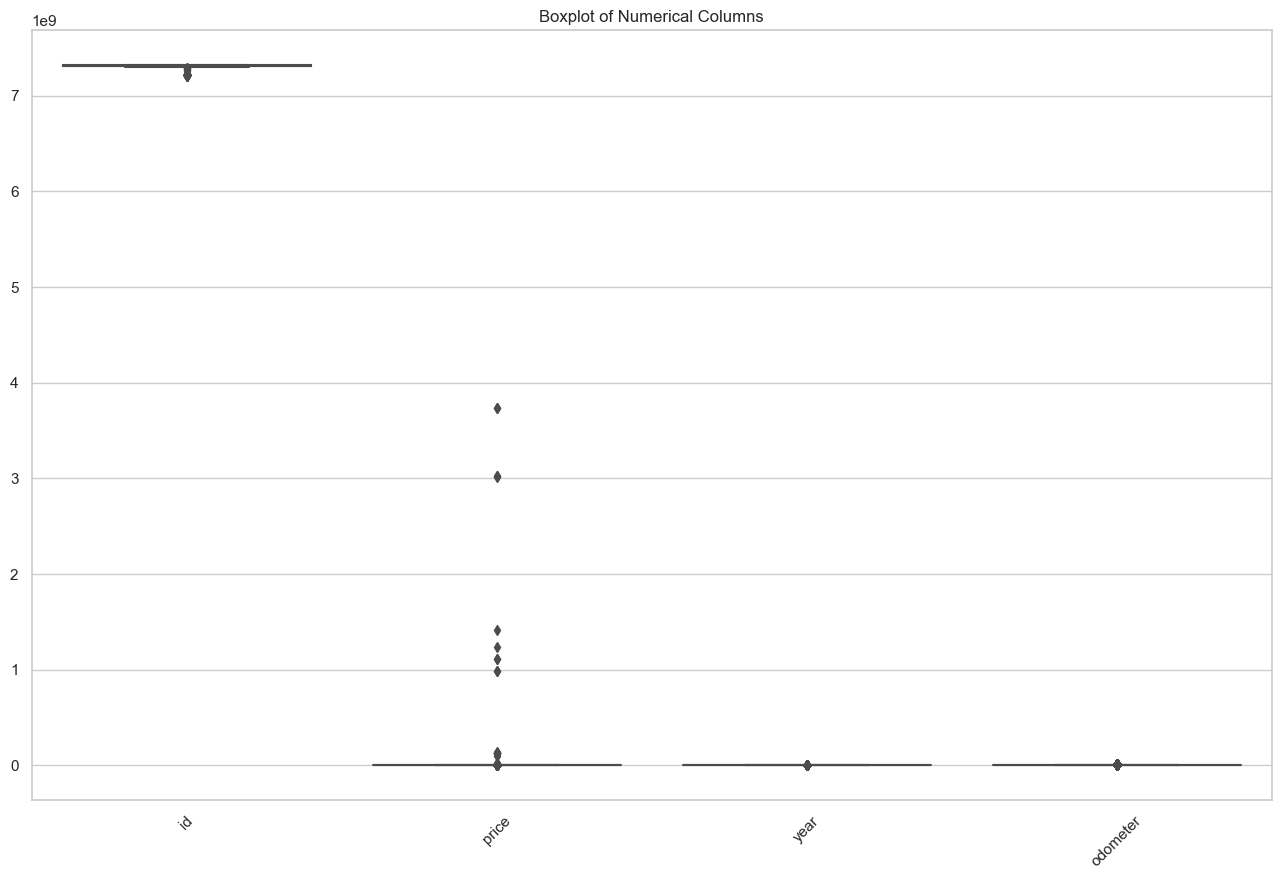

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [573]:
# Generate summary statistics for the dataset
summary_stats = df.describe(include='all')

# Visualize summary statistics for numerical columns
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

summary_stats

Summary Statistics and Visual Observations Summary Statistics:

The dataset contains 426,880 entries. There are several columns with missing values, such as year, manufacturer, model, condition, and others. The price column ranges from 0 to approximately 3.7 billion, which suggests that there may be outliers or erroneous entries. The year column ranges from 1900 to 2022, which is reasonable but may contain some outliers. The odometer column (representing mileage) has a range from 0 to 10 million, again suggesting potential outliers. Visual Observations from the Boxplot:

The price and odometer columns appear to have a significant number of outliers, as their boxplots are highly skewed. The year column also has some outliers but is less skewed compared to price and odometer.

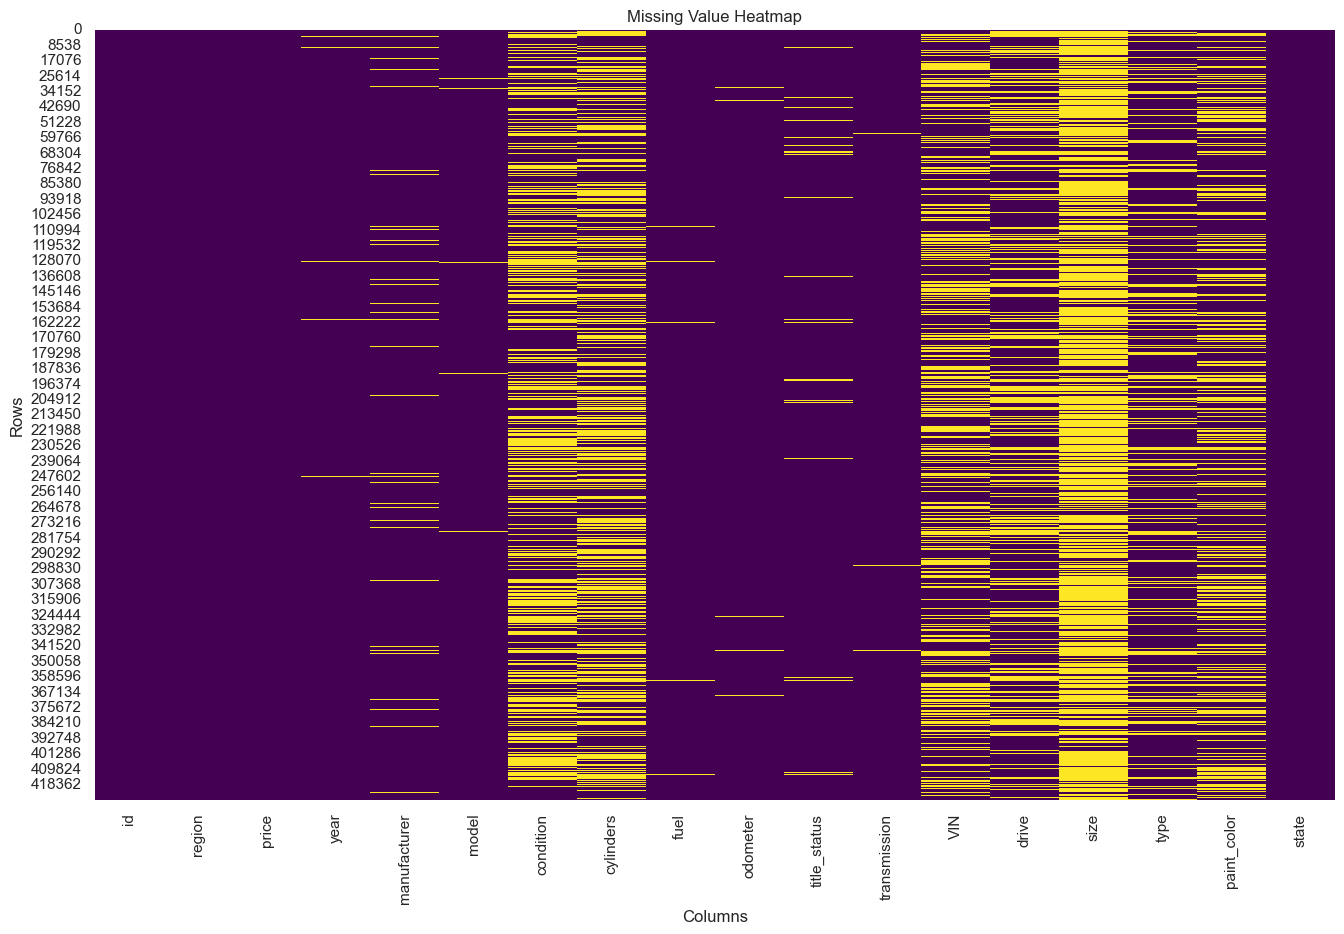

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64

In [574]:
# Generate a heatmap to visualize missing values
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.show()
# Visualize missing values
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

Missing Values Observations:¶
1-The size column has the highest percentage of missing values 71.77
2-The cylinders and condition columns are missing over 40
3-VIN, drive, and paint_color also have significant missing values, ranging from 30 to 38
4- Some key columns like manufacturer, title_status, model, and year have relatively fewer missing values

### Let's remove all the cars with $0:

In [575]:
df[df['price'] == 0]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


#### *** we need to remove these 

In [576]:
df = df.dropna()
df = df[df['price'] != 0]


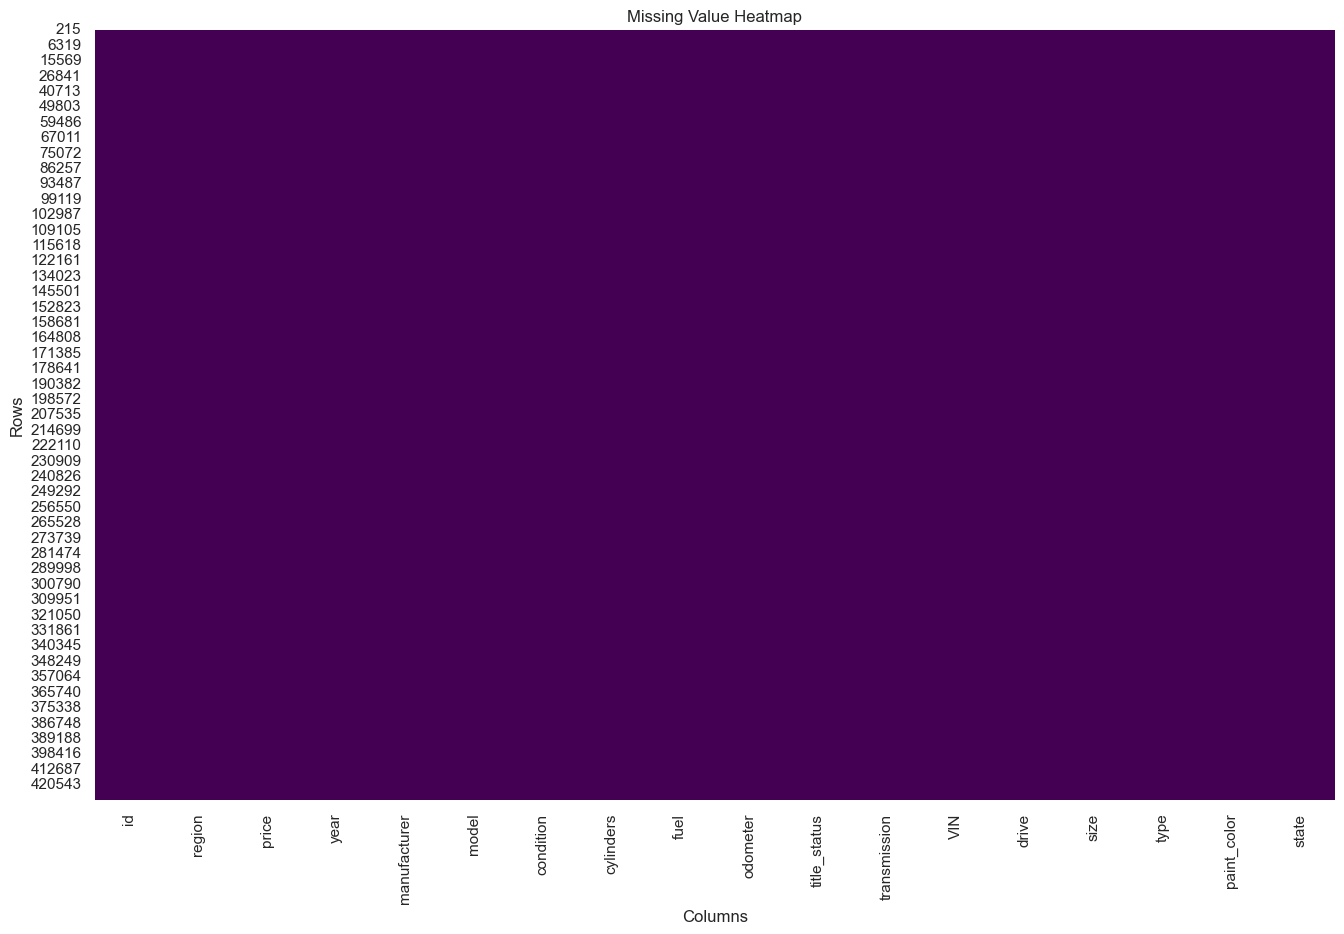

id              0.0
region          0.0
paint_color     0.0
type            0.0
size            0.0
drive           0.0
VIN             0.0
transmission    0.0
title_status    0.0
odometer        0.0
fuel            0.0
cylinders       0.0
condition       0.0
model           0.0
manufacturer    0.0
year            0.0
price           0.0
state           0.0
dtype: float64

In [577]:
# Generate a heatmap to visualize missing values
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.show()
# Visualize missing values
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32496 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  object 
 2   price         32496 non-null  int64  
 3   year          32496 non-null  float64
 4   manufacturer  32496 non-null  object 
 5   model         32496 non-null  object 
 6   condition     32496 non-null  object 
 7   cylinders     32496 non-null  object 
 8   fuel          32496 non-null  object 
 9   odometer      32496 non-null  float64
 10  title_status  32496 non-null  object 
 11  transmission  32496 non-null  object 
 12  VIN           32496 non-null  object 
 13  drive         32496 non-null  object 
 14  size          32496 non-null  object 
 15  type          32496 non-null  object 
 16  paint_color   32496 non-null  object 
 17  state         32496 non-null  object 
dtypes: float64(2), int64(2)

In [579]:
df['price'].describe()

count     32496.000000
mean      16993.479013
std       13219.394890
min           1.000000
25%        7500.000000
50%       13125.500000
75%       23395.000000
max      155000.000000
Name: price, dtype: float64

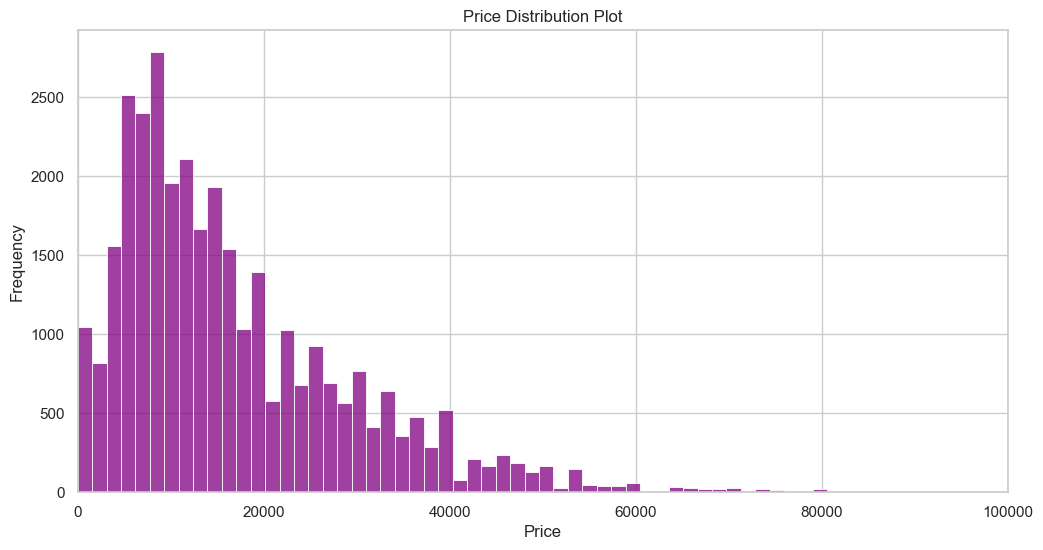

In [580]:
# Plotting the histogram for the 'price' column with updated title
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=False, color='purple')
plt.title('Price Distribution Plot')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim([0, 100000])  # Limiting the x-axis to show prices up to $100,000 for better visibility
plt.show()


#### *** let's check and investigate the Year 

In [581]:
df['year'].describe()

count    32496.000000
mean      2010.938269
std          7.274987
min       1905.000000
25%       2008.000000
50%       2012.000000
75%       2015.000000
max       2022.000000
Name: year, dtype: float64

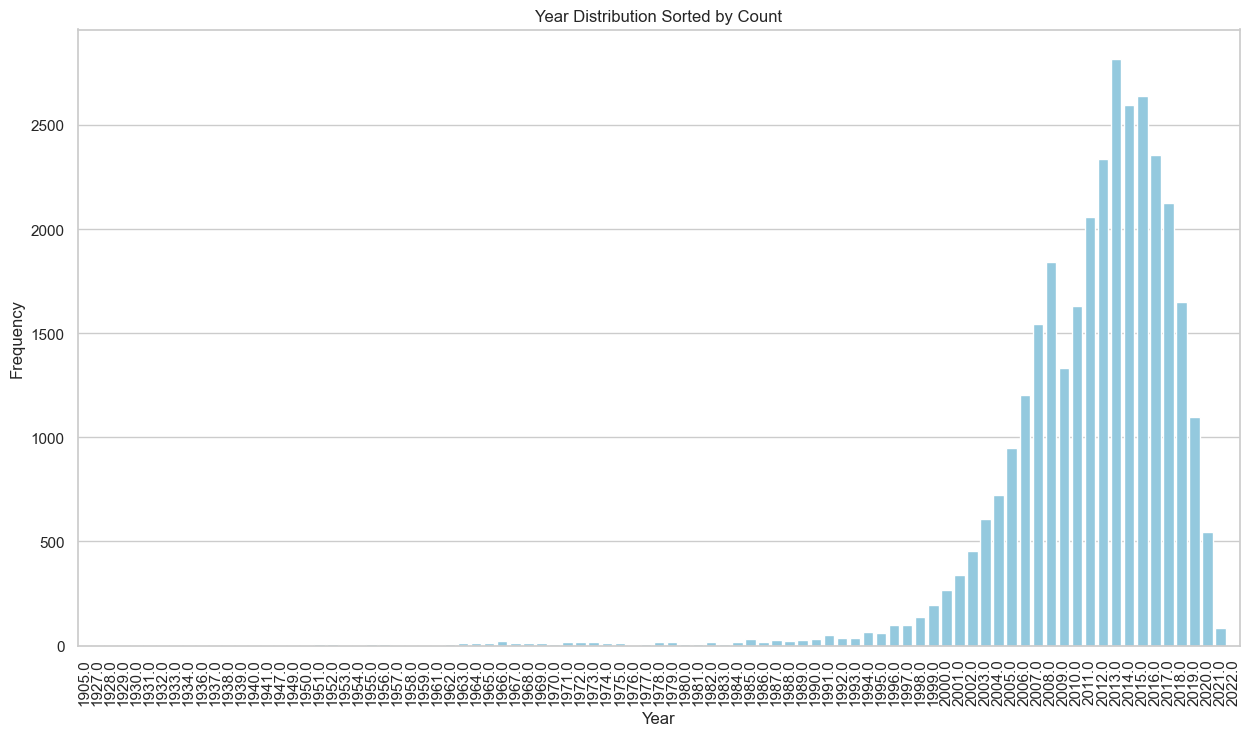

In [582]:
# Plotting the distribution of 'year' based on the count of each year in ascending order
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='year', order=df['year'].value_counts().sort_index().index, color='skyblue')
plt.title('Year Distribution Sorted by Count')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


###### OBSERVATIONS:  The plot confirms that the majority of used cars available are from the late 1990s to the present, with a peak in the late 2000s and early 2010s.


Most Frequent Years: The years from the early 2000s to the present dominate the dataset, with a noticeable peak around the years 2015-2019. This suggests that cars from these years are more commonly available on the used car market.

**********************************************

#### *****let's check and investigate the Manufacturer

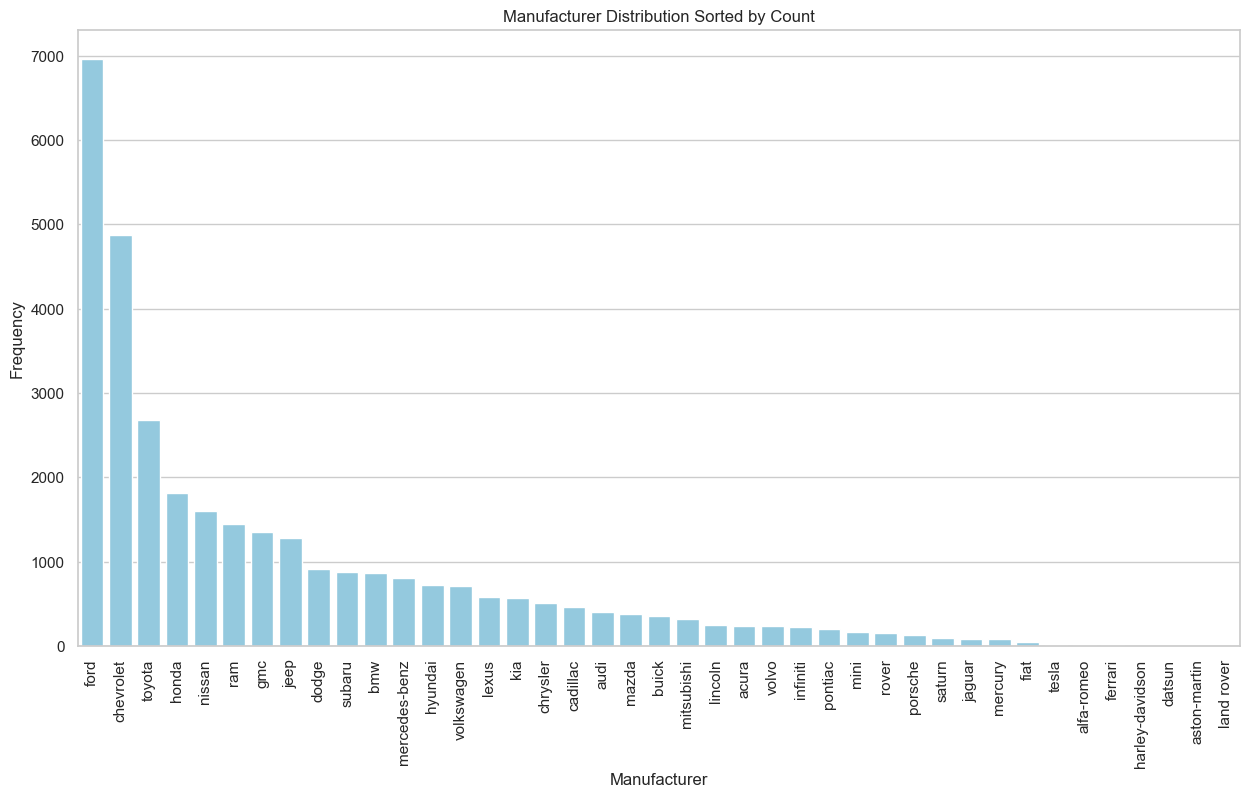

In [583]:
# Plotting the distribution of 'manufacturer' based on the count of each manufacturer
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='manufacturer', order=df['manufacturer'].value_counts().index, color='skyblue')
plt.title('Manufacturer Distribution Sorted by Count')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



**** The plot shows the distribution of car manufacturers in the dataset, sorted by frequency:

- Ford and Chevrolet: These two manufacturers dominate the dataset, indicating that they are very popular in the used car market.

- Toyota and Nissan: These manufacturers are also well-represented but are not as frequent as Ford and Chevrolet.

- Other Brands: Many other brands are present but in significantly lower numbers.

#### ****let's check and investigate the top 30 Model

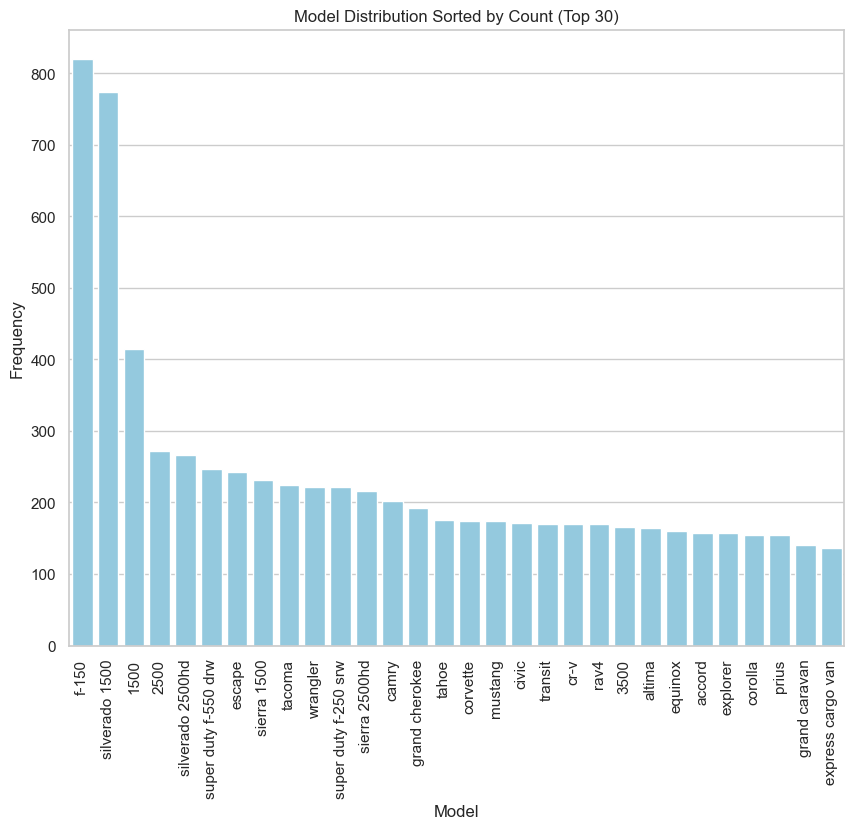

In [584]:
# Plotting the distribution of 'model' (Top 30 most frequent models for better visibility)
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='model', order=df['model'].value_counts().iloc[:30].index, color='skyblue')
plt.title('Model Distribution Sorted by Count (Top 30)')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


- F-150 and Silverado 1500: These models, corresponding to Ford and Chevrolet respectively, appear to be the most frequently occurring in the dataset. This aligns with the manufacturer distribution where Ford and Chevrolet were also the most common.
- Sedans and SUVs: Models like the Accord, Civic, and CR-V from Honda, as well as Camry and Corolla from Toyota, are also quite common. This indicates a strong market for both sedans and SUVs.

#### ****let's check and investigate the condition

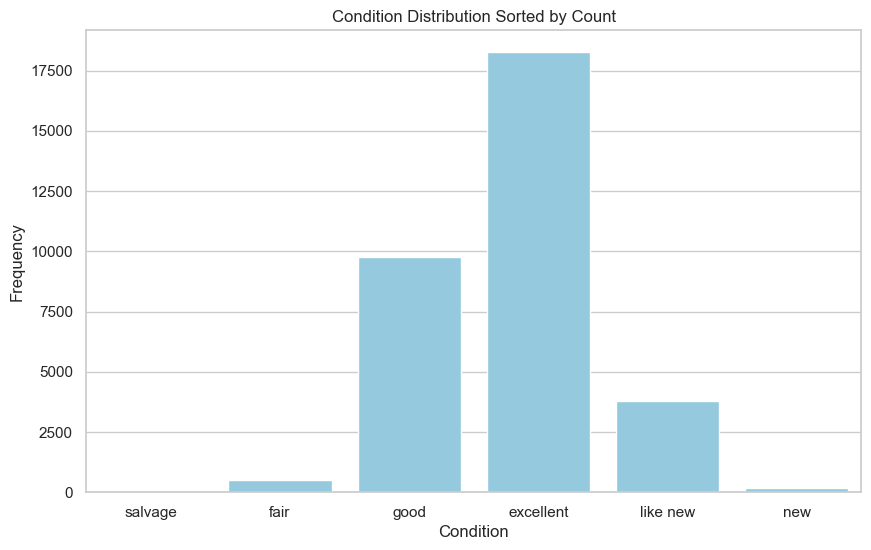

In [585]:
# Plotting the distribution of 'condition'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='condition', order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], color='skyblue')
plt.title('Condition Distribution Sorted by Count')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()


- Excellent and Good: The majority of cars are listed as being in 'excellent' or 'good' condition, which is likely a key selling point in the used car market.
- Fair and Like New: The number of cars in 'fair' and 'like new' conditions is notably lower but still significant.
- Salvage and New: Very few cars are listed as 'salvage' or 'new', which makes sense since most people would not sell a new car as a used car, and 'salvage' cars are generally less desirable.

#### ****let's check and investigate the fuel

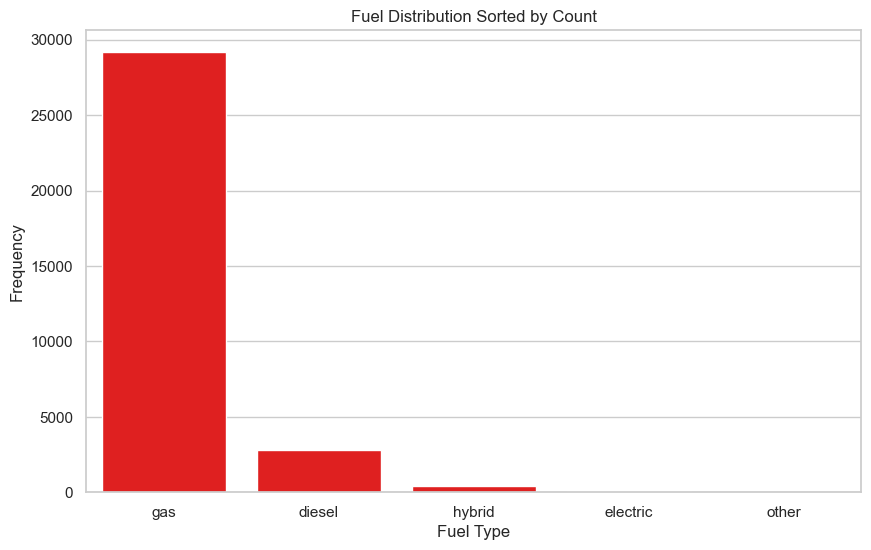

In [586]:
# Plotting the distribution of 'fuel'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index, color='red')
plt.title('Fuel Distribution Sorted by Count')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()


- Gas: The overwhelming majority of cars in the dataset run on gasoline, indicating that this is the most common fuel type in the used car market.

- Diesel: Diesel cars are the second most common but are significantly less frequent compared to gas-powered cars.

- Other Types: Other fuel types like hybrid, electric, and others are far less common. These might represent niche markets within the used car landscape.

#### ****let's check and investigate the Transmission

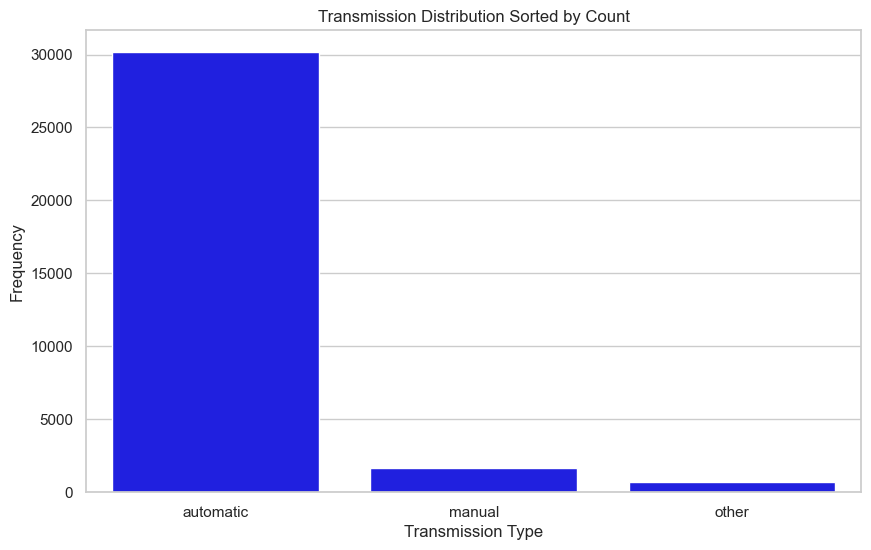

In [587]:
# Plotting the distribution of 'transmission'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index, color='blue')
plt.title('Transmission Distribution Sorted by Count')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.show()


- Automatic: The vast majority of cars in the dataset have automatic transmissions, which is consistent with current trends in the automotive industry and consumer preferences.

- Manual: Manual transmissions are significantly less common but still present in the dataset, catering to a niche market of driving enthusiasts or those who prefer manual control.

- Other Types: A small number of cars have 'other' types of transmissions, which could include semi-automatic or "manumatic" transmissions, CVTs (Continuously Variable Transmissions), etc.

#### ****let's check and investigate the paint_color'

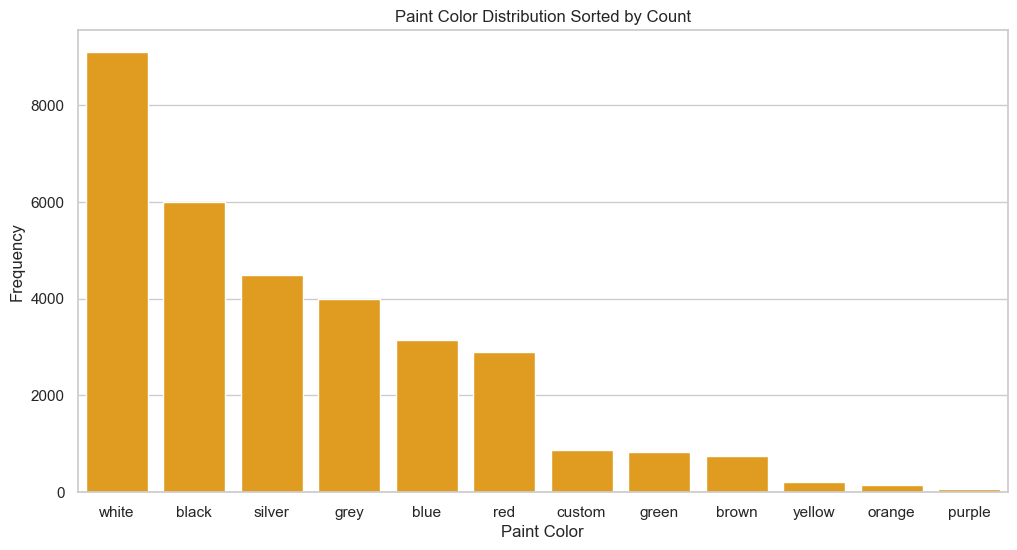

In [588]:
# Plotting the distribution of 'paint_color'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='paint_color', order=df['paint_color'].value_counts().index, color='orange')
plt.title('Paint Color Distribution Sorted by Count')
plt.xlabel('Paint Color')
plt.ylabel('Frequency')
plt.show()


- White and Black: These are the most common paint colors, likely because they are standard and neutral options that appeal to a broad range of consumers.

- Silver and Gray: These colors are also quite popular, falling just behind white and black.

- Other Colors: Colors like blue, red, and green are less common but still present in the dataset, catering to buyers looking for more unique options.

- Less Common Colors: Colors like orange, yellow, and purple are much less frequent, likely catering to niche markets.

## Multivariate Analysis

#### the relationship between 'price' and 'year'

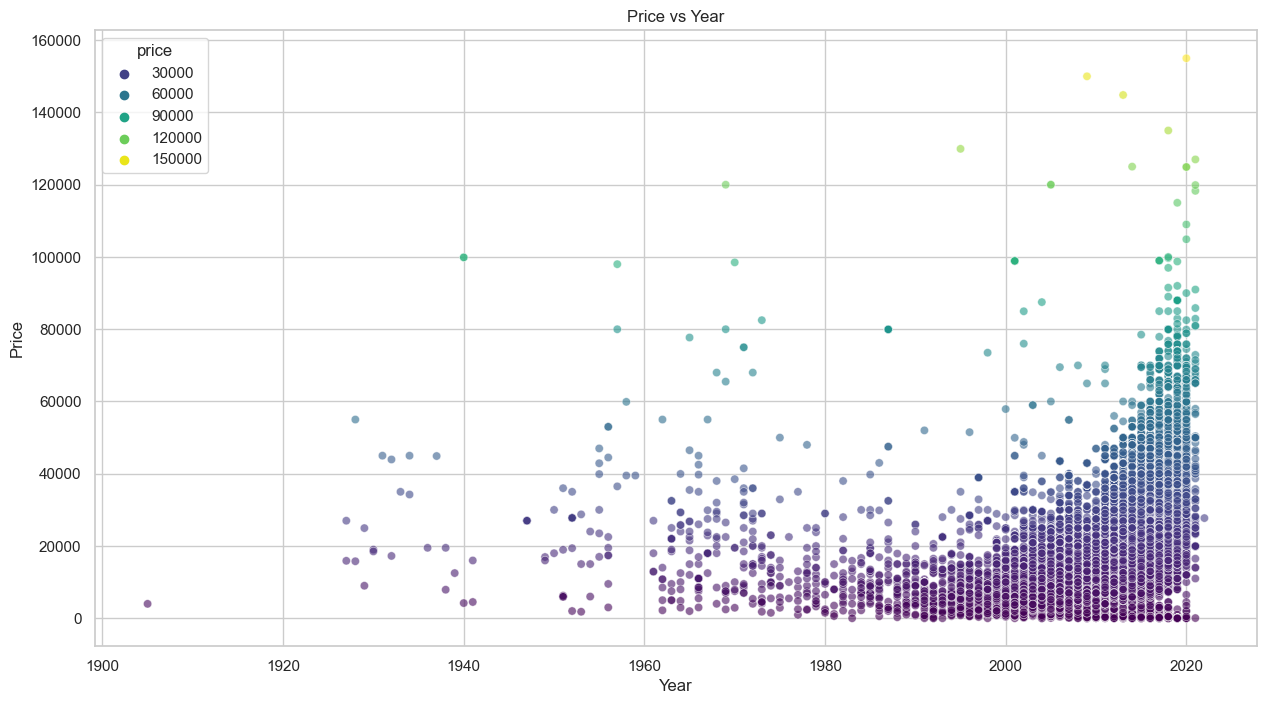

In [589]:
# Plotting the relationship between 'price' and 'year' with better coloring to differentiate data points
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='year', y='price', hue='price', palette='viridis', alpha=0.6)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


- General Trend: The color gradient allows us to see that newer cars (toward the right of the plot) generally have higher prices (indicated by the yellow-to-green hues), confirming our earlier observations.

- Variability: The range of colors among cars from recent years indicates a wide range of prices, suggesting that other factors are also influencing the price.

- Older Cars: Some older cars also show higher hues, indicating higher prices. These could be vintage or collector's cars.

#### the relationship between 'price' and 'condition'

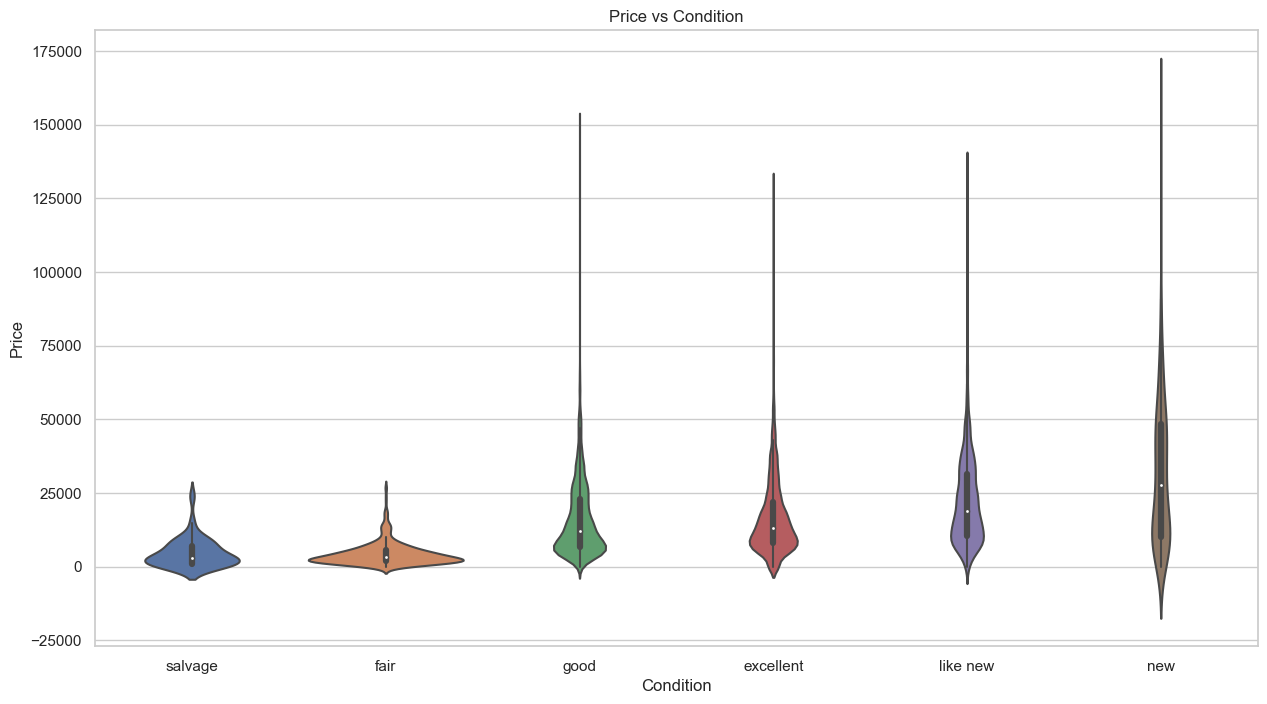

In [590]:
# Plotting Price vs Condition using a violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='condition', y='price', order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])
plt.title('Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


Salvage: Cars in 'salvage' condition have the lowest price range, with most cars priced below $10,000.

Fair: Cars in 'fair' condition have a slightly higher price range, but the majority are still priced below $10,000.

Good: Cars in 'good' condition show a broader range of prices, extending up to around $40,000.

Excellent: The range of prices for cars in 'excellent' condition is even broader, with some cars priced as high as $50,000.

Like New: Cars in 'like new' condition have a similar price range to those in 'excellent' condition, but the distribution is more concentrated around $20,000 to $30,000.

New: Cars listed as 'new' show a wide range of prices, with some reaching up to $55,000.

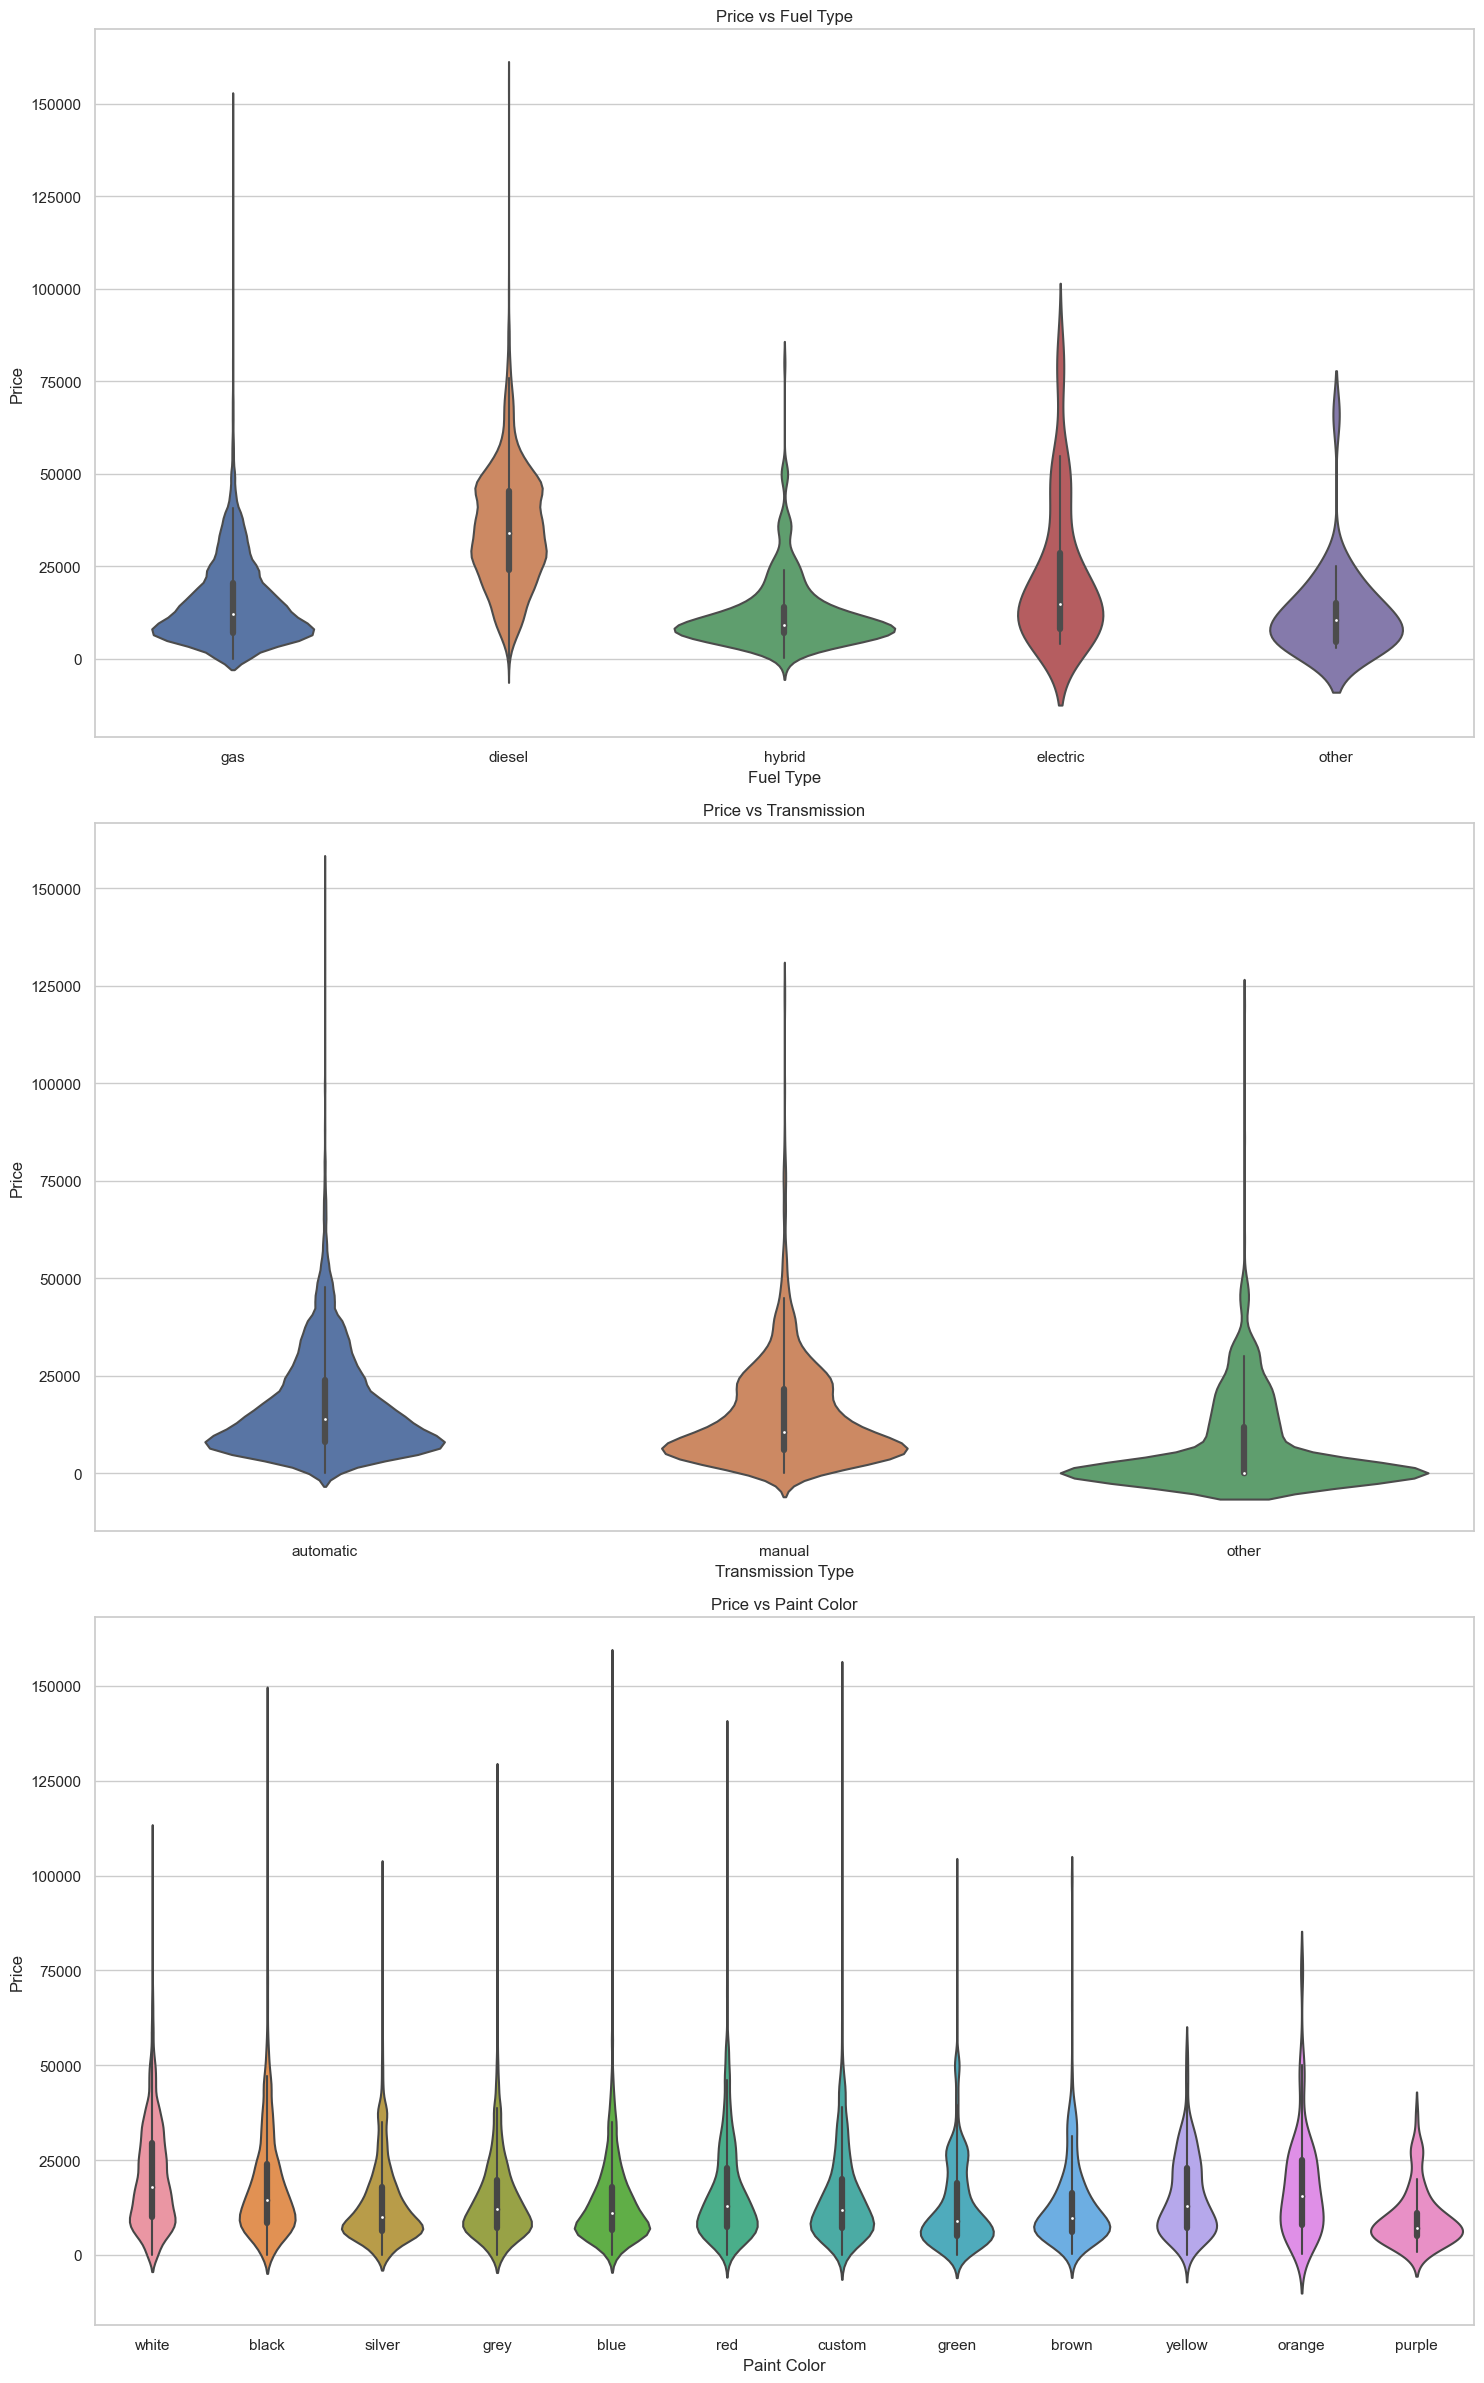

In [591]:
# Creating a series of violin plots for 'Price vs Fuel Type', 'Price vs Transmission', and 'Price vs Paint Color'

# Setting up the subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# Price vs Fuel Type
sns.violinplot(ax=axes[0], data=df, x='fuel', y='price', order=df['fuel'].value_counts().index)
axes[0].set_title('Price vs Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Price')

# Price vs Transmission
sns.violinplot(ax=axes[1], data=df, x='transmission', y='price', order=df['transmission'].value_counts().index)
axes[1].set_title('Price vs Transmission')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Price')

# Price vs Paint Color
sns.violinplot(ax=axes[2], data=df, x='paint_color', y='price', order=df['paint_color'].value_counts().index)
axes[2].set_title('Price vs Paint Color')
axes[2].set_xlabel('Paint Color')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()


In [592]:
#Price vs Fuel Type
#Gas: Most gas-powered cars are priced below $30,000, but there are some that extend up to $50,000.
#Diesel: Diesel cars have a wider price range, going up to around $55,000.
#Other: The 'Other' fuel types have prices mostly below $30,000, with a few exceptions.
#Price vs Transmission
#Automatic: The majority of automatic cars are priced below $30,000, but some extend up to $55,000.
#Manual: Manual cars generally have a lower price range, mostly below $20,000.
#Other: The 'Other' transmission types show a broad price range, similar to automatic cars.
#Price vs Paint Color
#White, Black, Silver, and Gray: These colors have a broad price range, extending up to around $55,000.
#Other Colors: Most other colors like blue, red, and green have a more limited price range, generally below $30,000.

#### ***let's see price vs condition

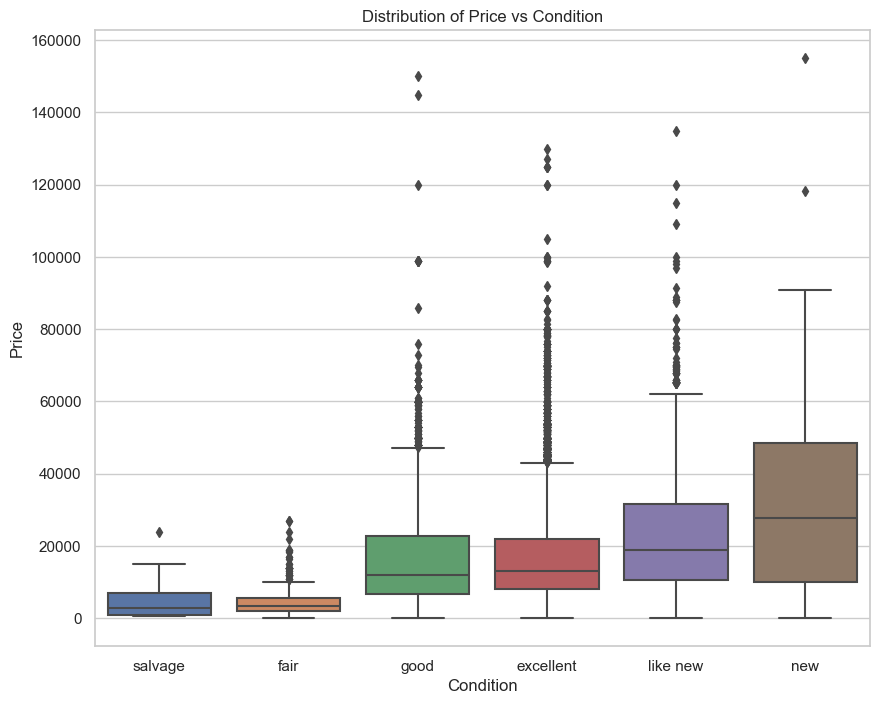

In [593]:
# Plotting the distribution of price vs condition using a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='condition', y='price', order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])
plt.title('Distribution of Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


## Step 3 :Data preparation

#### 1. Droping columns

In [594]:
df = df.drop(columns=['id','region', 'VIN'], axis=1)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


### 2. Column Transformation

## EDA

In [595]:
# Summary statistics for numerical variables
numerical_summary = df_cleaned.describe()

# Summary statistics for categorical variables
categorical_summary = df_cleaned.describe(include=['object'])

numerical_summary, categorical_summary


(               price          year      odometer
 count   32496.000000  32496.000000  3.249600e+04
 mean    16993.479013   2010.938269  1.089832e+05
 std     13219.394890      7.274987  1.022710e+05
 min         1.000000   1905.000000  0.000000e+00
 25%      7500.000000   2008.000000  6.744975e+04
 50%     13125.500000   2012.000000  1.055840e+05
 75%     23395.000000   2015.000000  1.428455e+05
 max    155000.000000   2022.000000  9.999999e+06,
        manufacturer  model  condition    cylinders   fuel title_status  \
 count         32496  32496      32496        32496  32496        32496   
 unique           41   4947          6            8      5            6   
 top            ford  f-150  excellent  6 cylinders    gas        clean   
 freq           6956    820      18259        10794  29175        31321   
 
        transmission   type paint_color  
 count         32496  32496       32496  
 unique            3     13          12  
 top       automatic    SUV       white  
 fre


### Column (Price)

In [596]:
# some weirdly low prices below $10 will be removed
df = df.query('price > 10 and price < 40000')
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


### *column:* model

In [597]:
top_50_models = df['model'].value_counts().sort_values(ascending=False).head(50).index.tolist()
df = df[df['model'].isin(top_50_models)]

# price_df['model'] = pd.factorize(price_df['model'])[0]+1

df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013.0,toyota,prius,excellent,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013.0,toyota,camry,excellent,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011.0,volkswagen,jetta,excellent,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426737,2500,2005.0,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014.0,jeep,grand cherokee,good,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014.0,ram,3500,good,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy
426782,23995,2013.0,toyota,tundra,good,8 cylinders,gas,114215.0,clean,automatic,4wd,full-size,truck,black,wy


### *column:* year

In [598]:
# convert to date
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df = df.query('year > 2000 and year <= 2020')
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,excellent,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,excellent,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,excellent,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426659,7999,2013,hyundai,elantra,excellent,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,good,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,good,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy


#### *column:* condition

In [599]:
# no new cars are requested by the business
df = df.query('condition != "new"')

# mapping into numeric values
condition_mapping = {'condition': {'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5 } }
df = df.replace(condition_mapping)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426659,7999,2013,hyundai,elantra,4,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,3,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy


#### *column:* paint_color

In [600]:
df = df[df['paint_color'].isin(['blue','white','silver','red','grey','black'])]
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426658,10999,2018,ford,focus,4,3 cylinders,gas,67241.0,clean,automatic,fwd,mid-size,sedan,grey,wy
426659,7999,2013,hyundai,elantra,4,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy


#### *column:* manufacturer

In [601]:
df = df[~df['manufacturer'].isin(['ferrari', 'harley-davidson', 'datsun', 'aston-martin','land rover'])]
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426658,10999,2018,ford,focus,4,3 cylinders,gas,67241.0,clean,automatic,fwd,mid-size,sedan,grey,wy
426659,7999,2013,hyundai,elantra,4,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy


#### *column:* title_status

In [602]:
df = df.query('title_status != "parts only"')
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426658,10999,2018,ford,focus,4,3 cylinders,gas,67241.0,clean,automatic,fwd,mid-size,sedan,grey,wy
426659,7999,2013,hyundai,elantra,4,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy


#### *column:* odometer

In [603]:
df = df.query("odometer > 1")
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426658,10999,2018,ford,focus,4,3 cylinders,gas,67241.0,clean,automatic,fwd,mid-size,sedan,grey,wy
426659,7999,2013,hyundai,elantra,4,4 cylinders,gas,110090.0,clean,automatic,fwd,full-size,sedan,black,wy
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy


In [604]:
categorical_variables = df.select_dtypes(include='object').columns.tolist()

pd.DataFrame(categorical_variables, columns=['categorical variables'])

,categorical variables
0,manufacturer
1,model
2,cylinders
3,fuel
4,title_status
5,transmission
6,drive
7,size
8,type
9,paint_color


# Step 4:  Modeling

##### Preparing to fit the model


Since I removed some columns and records. I'm going to crunch the dataset to have a unique combination of the categorical values in preparation to fit the model(s)

In [605]:
df = pd.DataFrame(df.groupby(df.select_dtypes(include='object').columns.tolist() + ['year'], as_index=False).mean())
df

,manufacturer,model,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,year,price,condition,odometer
0,chevrolet,2500,8 cylinders,gas,clean,automatic,4wd,full-size,truck,white,or,2017,35999.0,3.0,73225.0
1,chevrolet,3500,8 cylinders,diesel,clean,automatic,rwd,full-size,truck,white,ok,2005,9250.0,2.0,278511.0
2,chevrolet,3500,8 cylinders,gas,clean,automatic,rwd,full-size,pickup,white,tx,2011,15995.0,3.0,190000.0
3,chevrolet,corvette,6 cylinders,gas,clean,automatic,rwd,mid-size,coupe,silver,ks,2007,26370.0,4.0,49847.0
4,chevrolet,corvette,8 cylinders,gas,clean,automatic,rwd,compact,coupe,red,oh,2001,19000.0,5.0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,volkswagen,jetta,5 cylinders,gas,clean,manual,fwd,mid-size,sedan,grey,co,2015,10249.0,4.0,46855.0
5155,volkswagen,jetta,5 cylinders,gas,salvage,automatic,fwd,mid-size,sedan,grey,nj,2010,3700.0,3.0,114000.0
5156,volkswagen,jetta,6 cylinders,gas,clean,automatic,fwd,mid-size,sedan,red,ia,2016,12950.0,5.0,70350.0
5157,volkswagen,jetta,6 cylinders,gas,clean,automatic,rwd,full-size,sedan,red,fl,2010,9995.0,4.0,105834.0


Preparing the model dataframe

In [606]:
model_df = df.copy()
X = model_df.drop(columns=['price'], axis=1)
y = model_df['price']

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [608]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3611 entries, 4649 to 2933
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  3611 non-null   object 
 1   model         3611 non-null   object 
 2   cylinders     3611 non-null   object 
 3   fuel          3611 non-null   object 
 4   title_status  3611 non-null   object 
 5   transmission  3611 non-null   object 
 6   drive         3611 non-null   object 
 7   size          3611 non-null   object 
 8   type          3611 non-null   object 
 9   paint_color   3611 non-null   object 
 10  state         3611 non-null   object 
 11  year          3611 non-null   int64  
 12  condition     3611 non-null   float64
 13  odometer      3611 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 423.2+ KB


Selecting catergorical values to deal with them in the pipe

In [609]:
category_columns = X_train.select_dtypes(include=['object']).columns.tolist()
category_columns

['manufacturer',
 'model',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

### Fitting the models

#### Ridge regression 

In [610]:
# Define the parameter grid for GridSearchCV

ridge_param_grid = {
    'model__alpha': [0,0.1,1.0,10.0]
}

ridge_etl = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=np.object_)),
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)

# Pipeline

ridge_pipe = Pipeline([
    ('etl', ridge_etl),
    ('model', Ridge())
])

# Create an instance of GridSearchCV with the pipeline and parameter grid
ridge_grid_search = GridSearchCV(ridge_pipe, ridge_param_grid, verbose=1)

# Fit the grid search to your data
ridge_grid_search.fit(X_train, y_train)  # X and y are your input features and target variable

# Get the best estimator and best parameters
ridge_best_estimator = ridge_grid_search.best_estimator_
ridge_best_params = ridge_grid_search.best_params_

# print training and test scores

print(f' --------------------------- \n Ridge train score: {ridge_grid_search.score(X_train, y_train)} \n ---------------------------')
ridge_grid_search.cv_results_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
 --------------------------- 
 Ridge train score: 0.8359760277018147 
 ---------------------------


{'mean_fit_time': array([0.02907372, 0.02768745, 0.02407446, 0.01759162]),
 'std_fit_time': array([0.00205383, 0.00070039, 0.00089964, 0.00088309]),
 'mean_score_time': array([0.00453663, 0.00464907, 0.00466437, 0.00425448]),
 'std_score_time': array([0.00029578, 0.00026171, 0.00047307, 0.00041437]),
 'param_model__alpha': masked_array(data=[0, 0.1, 1.0, 10.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__alpha': 0},
  {'model__alpha': 0.1},
  {'model__alpha': 1.0},
  {'model__alpha': 10.0}],
 'split0_test_score': array([0.83962372, 0.83951109, 0.83867283, 0.83665632]),
 'split1_test_score': array([0.81017132, 0.81023922, 0.80942363, 0.79941918]),
 'split2_test_score': array([0.82816906, 0.82831148, 0.82832796, 0.82297548]),
 'split3_test_score': array([0.81555037, 0.81602133, 0.81619716, 0.80926308]),
 'split4_test_score': array([0.75751909, 0.75765934, 0.75774549, 0.74943729]),
 'mean_test_score': array([0.8

##### LASSO Regresion model

In [611]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import Lasso
import numpy as np

# Define the parameter grid for GridSearchCV
lasso_param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Create the column transformer for preprocessing
lasso_etl = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),  # Use object directly
    ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number))
])

# Create the pipeline
lasso_pipe = Pipeline([
    ('etl', lasso_etl),
    ('model', Lasso())
])

# Create an instance of GridSearchCV with the pipeline and parameter grid
lasso_grid_search = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, verbose=1)

# Assuming X_train and y_train contain your training data
# Fit the grid search to your data
lasso_grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your actual data

# Get the best estimator and best parameters
lasso_best_estimator = lasso_grid_search.best_estimator_
lasso_best_params = lasso_grid_search.best_params_

# Print training and test scores
print(f' --------------------------- \n Lasso train score: {lasso_best_estimator.score(X_train, y_train)} \n ---------------------------')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
 --------------------------- 
 Lasso train score: 0.8352756448549268 
 ---------------------------


In [612]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Revised parameter grid
lr_param_grid = {
    'etl__numeric__poly__degree': [2, 3, 4],  # Control PolynomialFeatures here
    'model__fit_intercept': [True, False]  # Use valid parameter for LinearRegression
}

# Column transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures())  # PolynomialFeatures included in a sub-pipeline
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

lr_etl = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, make_column_selector(dtype_include=np.number)),
        ('categorical', categorical_transformer, make_column_selector(dtype_include=np.object_))
    ])

# Pipeline
lr_pipe = Pipeline([
    ('etl', lr_etl),
    ('model', LinearRegression())
])

# Create an instance of GridSearchCV with the pipeline and parameter grid
lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, verbose=1)

# Fit the grid search to your data
# X_train, y_train are your features and target variable
lr_grid_search.fit(X_train, y_train)  

# Get the best estimator and best parameters
lr_best_estimator = lr_grid_search.best_estimator_
lr_best_params = lr_grid_search.best_params_

print(f' --------------------------- \n LR train score: {lr_best_estimator.score(X_train, y_train)} \n ---------------------------')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
 --------------------------- 
 LR train score: 0.8616660595305238 
 ---------------------------


# Step 5: Evaluation

In [613]:
ridge_grid_search

GridSearchCV(estimator=Pipeline(steps=[('etl',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa3ea9db2b0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa3e873aa60>)])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0, 0.1, 1.0, 10.0]}, verbose=1)

In [614]:
ridge_best_estimator.score(X_test, y_test)

0.8332678673522904

In [615]:
lasso_grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('etl',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa24aa1a4f0>),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa24aa3d130>)])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

In [616]:
lasso_best_estimator.score(X_test,y_test)

0.8330615282664853

In [617]:
lr_grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('etl',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa24aa35310>),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa24aa35970>)])),
                                       ('model', LinearRegression())]),
             param_grid={'etl__numeric__poly__degree': [2, 3, 4],
                         'model__fit_intercept': [True, False]},
             verbose=1)

In [618]:
lr_best_estimator.score(X_test, y_test)

0.8537916288895175

 ### Predictions analysis

In [619]:
test_results_df = pd.DataFrame(y_test.copy())
test_results_df.rename(columns={'price': 'aPrice'}, inplace=True)
test_results_df['pPrice'] = lr_best_estimator.predict(X_test)
test_results_df.reset_index(inplace=True)
test_results_df.drop(columns=['index'], inplace=True)
test_results_df

,aPrice,pPrice
0,4495.0,1109.156825
1,24595.0,24569.814833
2,17795.0,20338.952816
3,17900.0,19831.887374
4,15995.0,14253.790804
...,...,...
1543,12995.0,14794.977970
1544,21950.0,27366.779257
1545,16995.0,18509.265609
1546,38300.0,34549.557571


In [620]:
# Reset index and sort by 'aPrice'
sorted_df = test_results_df.reset_index(drop=True).sort_values(by='aPrice', ascending=False)

# Use 'assign' to add a new index column
sorted_df = sorted_df.assign(new_index=sorted_df.index)

# Use 'set_index' and 'stack' to melt the DataFrame
stacked_df = sorted_df.set_index('new_index').stack().reset_index()

# Rename the columns
stacked_df.columns = ['index', 'Price Type', 'Price']

# Drop the 'index' column and reset index
stacked_df.drop(columns=['index'], inplace=True)
stacked_df.reset_index(drop=True, inplace=True)




In [621]:
stacked_df

,Price Type,Price
0,aPrice,39999.000000
1,pPrice,27863.852092
2,aPrice,39950.000000
3,pPrice,38925.064637
4,aPrice,39950.000000
...,...,...
3091,pPrice,18300.250664
3092,aPrice,199.000000
3093,pPrice,15225.881183
3094,aPrice,199.000000


In [622]:
# Adding an index-like column for plotting
stacked_df['index'] = stacked_df.index

fig = px.scatter(stacked_df, x='index', y='Price', color='Price Type',
                 title='Comparison of Actual and Predicted Price',
                 labels={'index': 'Car Records', 'Price': 'Price'},
                 color_discrete_sequence=['blue', 'green'])

fig.update_traces(marker=dict(size=6,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()



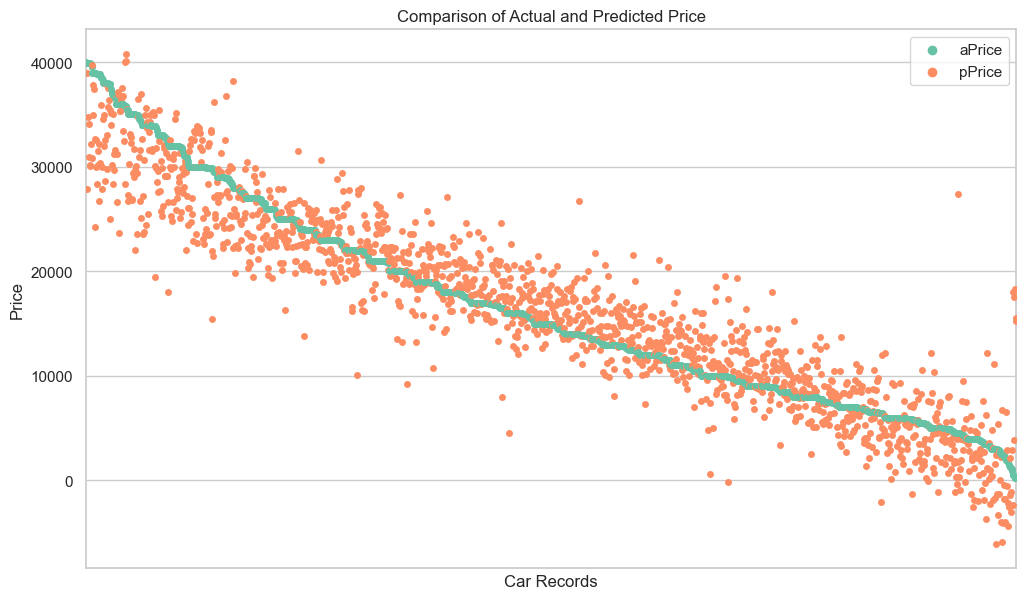

In [623]:
# Adding an index-like column for plotting
stacked_df['index'] = stacked_df.index

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.stripplot(data=stacked_df, x='index', y='Price', hue='Price Type', palette='Set2', jitter=True, dodge=True)

plt.title('Comparison of Actual and Predicted Price')
plt.xlabel('Car Records')
plt.ylabel('Price')
plt.xticks([])
plt.legend(loc='upper right')

plt.show()


In [624]:
pred_error = pd.DataFrame(abs(test_results_df['aPrice'] - test_results_df['pPrice']), columns=['absoulte_error'])
pred_error.reset_index(inplace=True)

# calculate MAE
mae = pred_error.mean()

# print mae
print(f'MAE: {mae[0]}')


pred_error

MAE: 773.5


,index,absoulte_error
0,0,3385.843175
1,1,25.185167
2,2,2543.952816
3,3,1931.887374
4,4,1741.209196
...,...,...
1543,1543,1799.977970
1544,1544,5416.779257
1545,1545,1514.265609
1546,1546,3750.442429


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


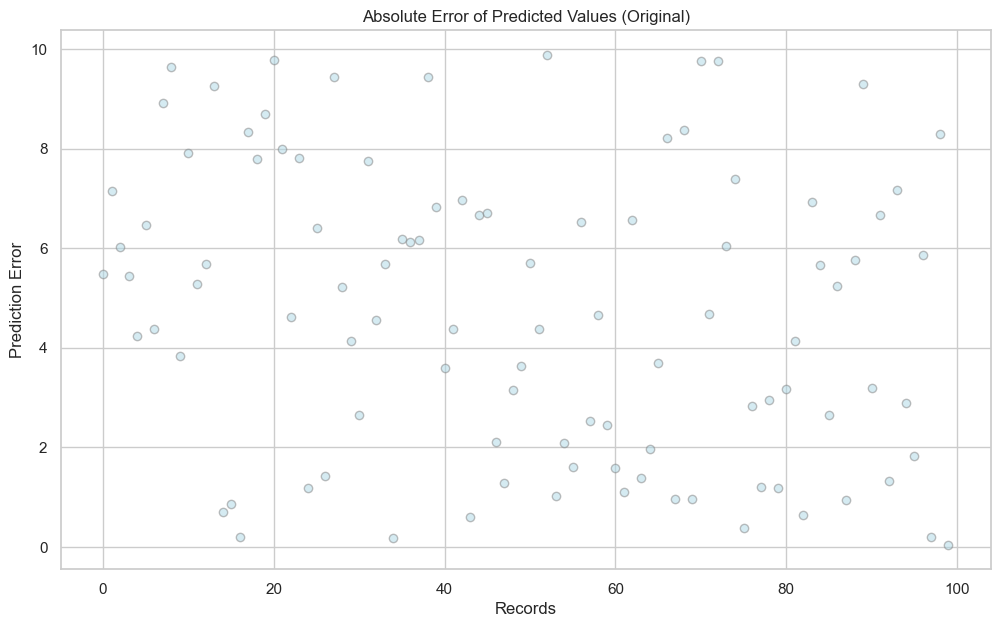

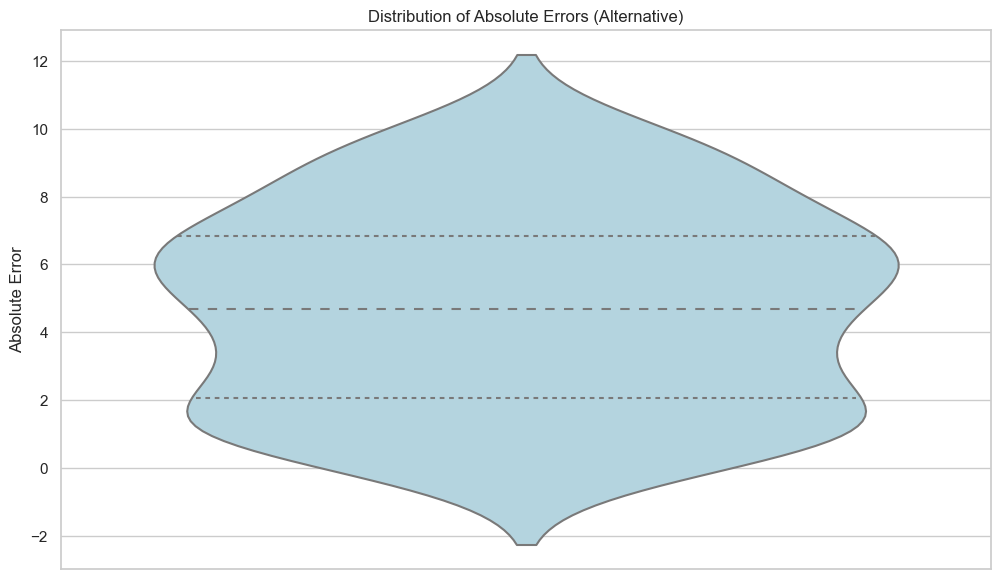

In [625]:
# Importing seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(0)
n = 100  # Number of samples

# Create a sample DataFrame for predicted error
pred_error = pd.DataFrame({
    'absoulte_error': np.random.uniform(0, 10, n)
})

# Original Scatter Plot as per given code
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.scatterplot(x=pred_error.index, y=pred_error['absoulte_error'], color='lightblue', edgecolor='gray', linewidth=1, alpha=0.5)
plt.title('Absolute Error of Predicted Values (Original)')
plt.xlabel('Records')
plt.ylabel('Prediction Error')
plt.gca().set_facecolor('white')
plt.legend().remove()
plt.show()

# Alternative: Seaborn Violinplot
plt.figure(figsize=(12, 7))
sns.violinplot(y=pred_error['absoulte_error'], inner='quartile', color='lightblue')
plt.title('Distribution of Absolute Errors (Alternative)')
plt.ylabel('Absolute Error')
plt.show()


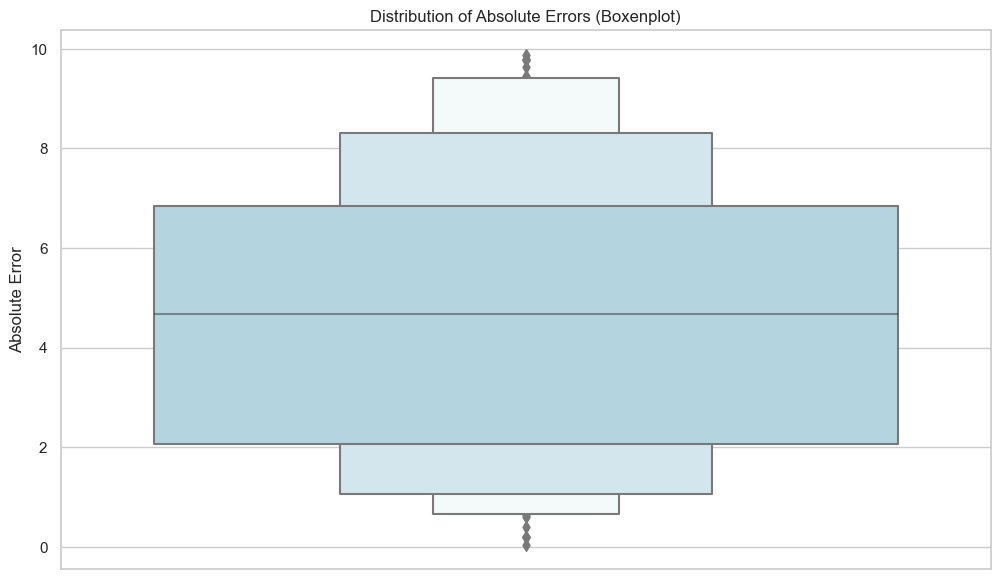

In [626]:
plt.figure(figsize=(12, 7))
sns.boxenplot(y=pred_error['absoulte_error'], color='lightblue')
plt.title('Distribution of Absolute Errors (Boxenplot)')
plt.ylabel('Absolute Error')
plt.show()



### Feature Importance Analysis

In [627]:
feature_names = lr_best_estimator.named_steps['etl'].get_feature_names_out()

In [628]:
coefficients = lr_best_estimator.named_steps['model'].coef_

In [629]:
coefs_df = pd.DataFrame({'coefficient':coefficients}, index = feature_names).sort_values(by='coefficient')
coefs_df.reset_index(inplace=True)

# rename index to feature
coefs_df.rename(columns={'index': 'feature'}, inplace=True)

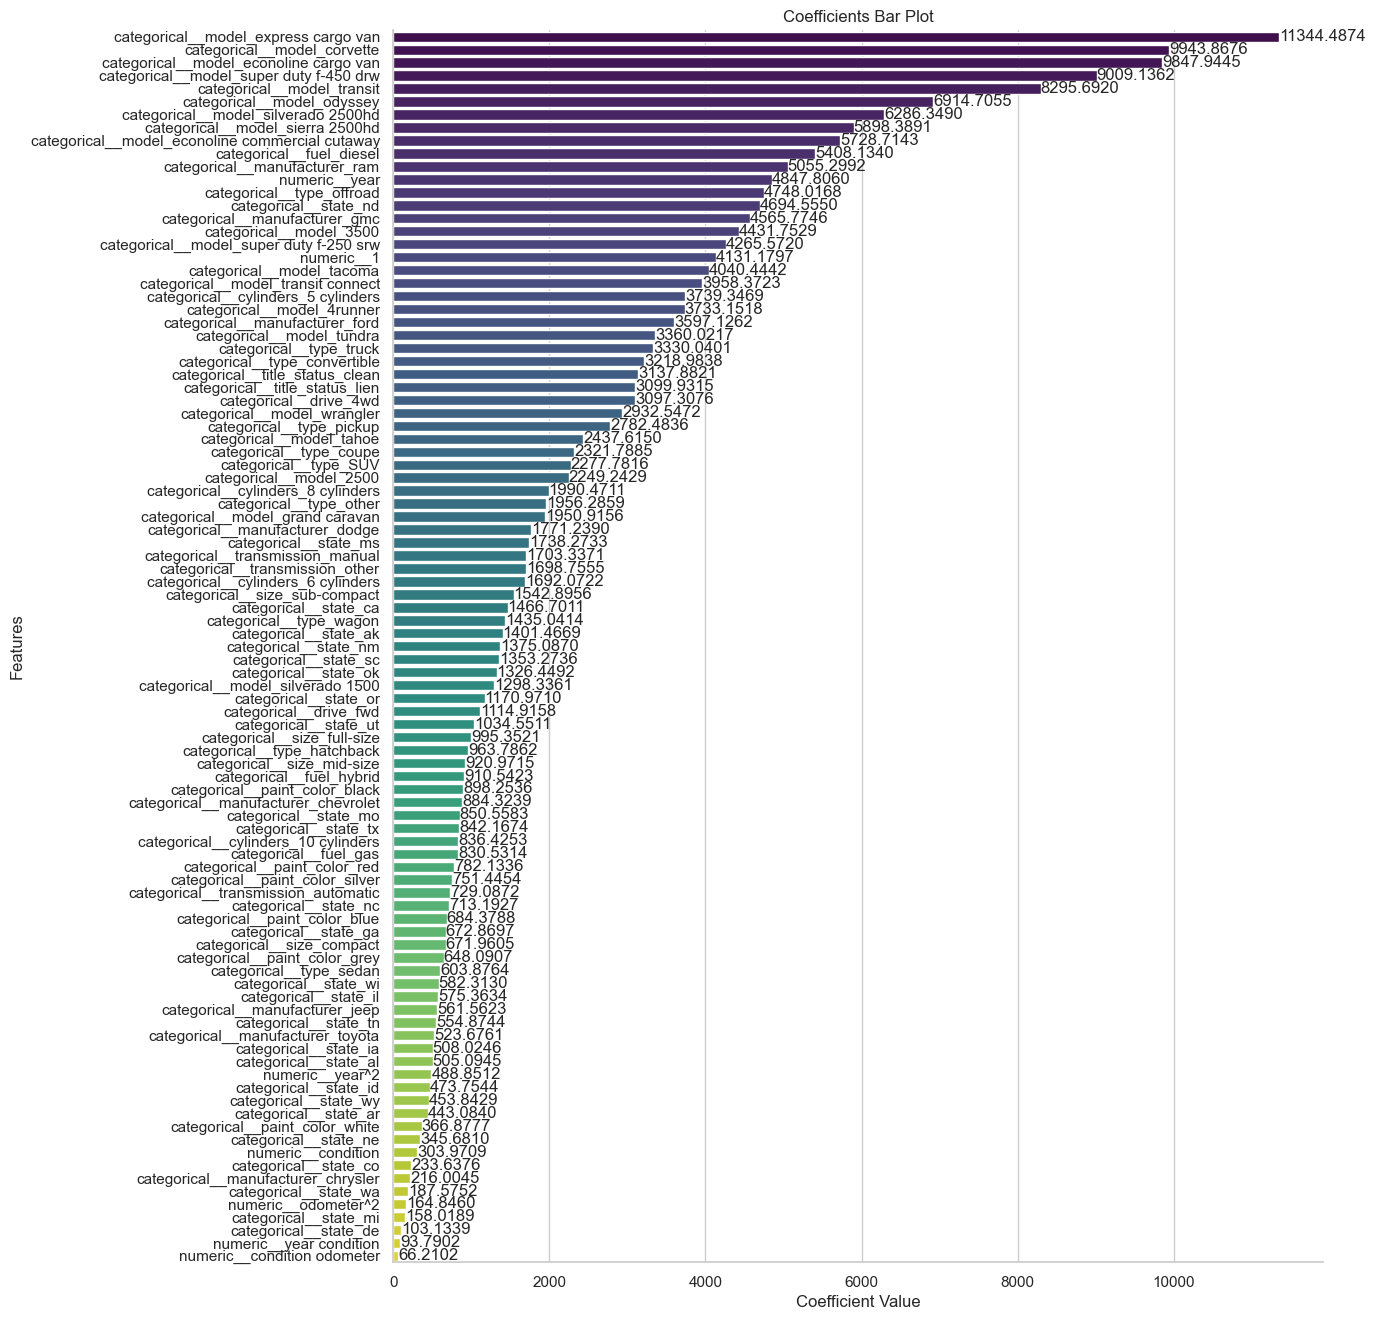

In [630]:
# Sort DataFrame for better visualization
coefs_plot_df = coefs_plot_df.sort_values(by='coefficient', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 16))
ax = sns.barplot(x=coefs_plot_df['coefficient'], y=coefs_plot_df['feature'], palette='viridis')

# Add text annotations
for p in ax.patches:
    ax.annotate(f"{p.get_width():.4f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

# Set title and labels
plt.title('Coefficients Bar Plot')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Remove top and right spines
sns.despine()

# Display the plot
plt.show()


## permutation importance

In [631]:
r = permutation_importance(lr_grid_search, X_test, y_test, n_repeats=30, random_state=22)
r

{'importances_mean': array([ 1.22326148e-01,  4.63425811e-01,  3.38854251e-02,  1.95615499e-02,
         8.14767324e-03,  1.19470892e-03,  3.03894667e-02, -1.94385663e-04,
         1.30468250e-01,  7.15871518e-04,  1.71421306e-02,  4.44636187e-01,
         2.73803937e-03,  1.69352090e-01]),
 'importances_std': array([0.00453943, 0.01855085, 0.00254971, 0.00191614, 0.00116537,
        0.0003716 , 0.00251294, 0.00016932, 0.00505343, 0.00037944,
        0.00218427, 0.01767881, 0.00078689, 0.00821527]),
 'importances': array([[ 1.18236842e-01,  1.26497047e-01,  1.28482673e-01,
          1.17780123e-01,  1.24150964e-01,  1.23312497e-01,
          1.15694832e-01,  1.35012233e-01,  1.17886134e-01,
          1.25237452e-01,  1.19917369e-01,  1.28653144e-01,
          1.20454844e-01,  1.22450061e-01,  1.18747923e-01,
          1.24080641e-01,  1.31766499e-01,  1.17060165e-01,
          1.19260484e-01,  1.22191160e-01,  1.21879016e-01,
          1.17733211e-01,  1.23192333e-01,  1.14883543e-01,


Creating a dataframe with the importance coeficients generated by the model

In [632]:
feature_importances = pd.DataFrame(r.importances, index = X_test.columns).T
feature_importances

,manufacturer,model,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,year,condition,odometer
0,0.118237,0.474370,0.035533,0.017990,0.010090,0.001224,0.030048,-0.000209,0.123070,0.000855,0.019056,0.481916,0.002405,0.177647
1,0.126497,0.490531,0.033767,0.023460,0.009216,0.001533,0.029704,-0.000054,0.126748,0.000842,0.019265,0.445905,0.003156,0.166587
2,0.128483,0.453362,0.031782,0.019419,0.009157,0.001612,0.029815,-0.000042,0.131284,0.000387,0.019518,0.442543,0.001381,0.168948
3,0.117780,0.485197,0.031810,0.020802,0.007606,0.000911,0.026425,-0.000495,0.125142,0.000627,0.013310,0.412220,0.001932,0.161705
4,0.124151,0.430040,0.030128,0.017072,0.007275,0.001461,0.031532,-0.000345,0.124517,0.001293,0.019294,0.470669,0.004343,0.182106
5,0.123312,0.486756,0.034430,0.020375,0.008921,0.001452,0.031946,-0.000224,0.127879,0.000945,0.015731,0.451301,0.002406,0.171100
6,0.115695,0.504696,0.037337,0.019809,0.009653,0.001594,0.029341,0.000074,0.131004,-0.000121,0.017338,0.429928,0.002530,0.152465
7,0.135012,0.483185,0.038890,0.017344,0.009009,0.001065,0.027466,-0.000089,0.140507,0.000717,0.020402,0.432807,0.002590,0.163680
8,0.117886,0.461554,0.033026,0.020374,0.009464,0.002162,0.029704,-0.000373,0.129996,0.000671,0.019287,0.465385,0.002614,0.171681
9,0.125237,0.451569,0.033816,0.020256,0.009056,0.000745,0.026695,-0.000285,0.135249,0.000135,0.014969,0.447908,0.002721,0.176936


creating a ranking of importance of the features

In [633]:
top_features_df = pd.DataFrame(feature_importances.mean().sort_values(ascending=False), columns=['importance'])
top_features_df

,importance
model,0.463426
year,0.444636
odometer,0.169352
type,0.130468
manufacturer,0.122326
cylinders,0.033885
drive,0.030389
fuel,0.019562
state,0.017142
title_status,0.008148


In [634]:
#initialize notebook mode for Plotly

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [635]:
import plotly.express as px

# Create the box plot
fig = px.box(melted_df, x='Feature', y='Importance', title='Most Important Factors Driving Car Price')
fig.show()

In [636]:
print(melted_df.head())

   Feature  Importance
0    model    0.474370
29   model    0.473460
28   model    0.469799
27   model    0.430197
26   model    0.466426


## Conclusion:
- The most critical factors in forecasting car prices are the model and the year, with the odometer reading ranking a distant third. Surprisingly, despite its high coefficient value, the odometer's influence is less significant than expected.

# Step 5:  Recomendations


In [637]:
top_price_df = vehicles_df.copy()

# mean price by model
top_price_df = pd.DataFrame(top_price_df.groupby(['model', 'year'], as_index=False).mean())

# top 10 models by price
top_price_df = top_price_df.sort_values(by=['year', 'price'], ascending=False).head(10)[['model', 'year', 'price']]

top_price_df

,model,year,price
3501,eclipse cross se,2022.0,27725.0
3928,escalade,2021.0,126995.0
2840,corvette,2021.0,119900.0
9947,supercharged,2021.0,118300.0
6555,land cruiser,2021.0,90978.0
11451,yukon xl,2021.0,85867.0
9878,super duty f-250,2021.0,82900.0
9021,sierra 1500,2021.0,80870.0
10078,tahoe,2021.0,72900.0
268,2500 cummins 4x4,2021.0,71495.0


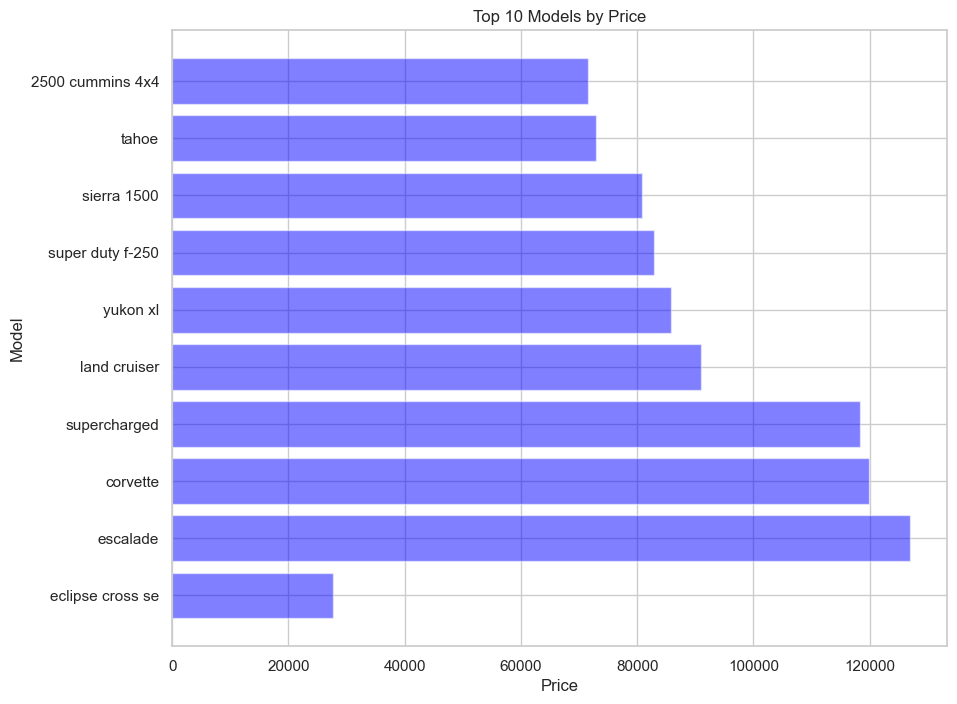

In [638]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_price_df['model'], top_price_df['price'], alpha=0.5, color='blue')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Model')
plt.title('Top 10 Models by Price')

# Show the plot
plt.show()


#### Here's a quick summary of what the data shows:



- 1- Escalade is the most expensive model, with an average price of $126,995.

- 2- Corvette comes in second, with an average price of $119,900.

- 3- Supercharged is the third most expensive model, priced at an average of $118,300.

- 4- The list also includes models like Land Cruiser, Yukon XL, and Super Duty F-250, among others, with prices ranging from approximately $90,978 to $70,590.

### Conclusion 


- Luxury and Performance: The top three models (Escalade, Corvette, and Supercharged) are luxury or performance vehicles, which explains their higher price points.

- SUVs and Trucks: The list predominantly features SUVs and trucks, which are generally priced higher than sedans and compact cars.

- Price Range: There's a significant price difference between the top and bottom models on the list, with the Escalade being nearly twice as expensive as the Suburban Premier.

- Brands: While the brands are not listed, knowing the brands could offer additional insights. For instance, luxury brands are expected to have higher prices.

- This information could be valuable for understanding the market dynamics of car pricing in 2021, identifying trends, or making informed decisions if you are in the market for a car.